### Probability Distributions Exercises

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import viz

#### scipy distribution object: What can we calculate from distribution?


- value -> probability  
   -- pmf: equal to a point (only for discrete distributions!)  
    -- pdf: equal to a point (for continuous distributions)  
   -- cdf: less than or equal to a point  
   -- sf: greater than a point  
- probability -> value  
   -- ppf: less than or equal to a point  
   -- isf: greater than a point  
- rvs for random values 

Types of Distribution:
1. Normal distribution
    - mean($\mu$)
    - std dev ($\sigma$)
    - stats.norm($\mu$,  $\sigma$ )


2. Binomial distribution
    - number of trials (n)
    - probability of success (p)
    - stats.binom(n, p )
    - X = number of success in trials


3. Poisson distribution
    - rate ($\lambda$)
    - stats.poisson($\lambda$)
    - X = number of events per unit time
    
 
For a defined probability distribution above, we can answer different questions using following functions:

- pmf/pdf
- cdf/ppf
- sf/isf

##### For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [32]:
λ = 2

# What is the probability that no cars drive up in the noon hour?

stats.poisson(λ).pmf(0)

0.1353352832366127

In [33]:
# What is the probability that 3 or more cars come through the drive through?
stats.poisson(λ).sf(2)

0.32332358381693654

In [34]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(λ).sf(0)

0.8646647167633873

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [35]:
mean = 3.0
std_dev = .3
grades = stats.norm(mean, std_dev)

In [36]:
# What grade point average is required to be in the top 5% of the graduating class?
grades.isf(.05)

3.4934560880854417

In [37]:
# What GPA constitutes the bottom 15% of the class?
grades.isf(0.85)

2.689069983151863

In [38]:
# or
grades.ppf(0.15)

2.689069983151863

In [39]:
# An eccentric alumnus left scholarship money for students in the third decile from the 
# bottom of their class. Determine the range of the third decile. Would a student with a 
# 2.8 grade point average qualify for this scholarship?
grades.ppf([0.2,0.3])

array([2.74751363, 2.84267985])

In [40]:
# If I have a GPA of 3.5, what percentile am I in?
grades.cdf(3.5) * 100

95.22096477271853

In [55]:
# by Simulation
(np.random.normal(3, 0.3, 100_000) < 3.5).mean()

0.95186

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [56]:
n = 4326
p = 0.02

stats.binom(n, p).sf(96)

0.1397582363130086

In [67]:
# by Simluation
clicks = np.random.choice([0,1], (10_000, 4326), p = [0.98, 0.02])
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
100 - clicks.sum(axis=1).mean()

13.449399999999997

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [74]:
# What is the probability that at least one of your first 60 answers is correct?
n = 60 
p = 0.01

stats.binom(n, p).sf(0) # greater than a point

0.4528433576092388

In [76]:
# by simulation
((np.random.choice([0,1], (10_000, 60), p = [0.99, 0.01])).sum(axis=1) > 0).mean()

0.4568

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

In [77]:
n = (66*0.9)
p = .03 

stats.binom(n, p)

# How likely is it that the break area gets cleaned up each day?
stats.binom(n, p).sf(0) # greater than a point

0.8342199288437355

Text(0.5, 0, 'Number of times area is cleaned per day')

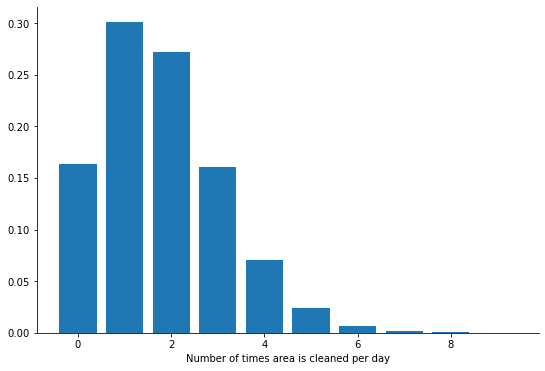

In [80]:
x = np.arange(0,10)
y = stats.binom(n,p).pmf(x)
plt.bar(x,y)
plt.xlabel('Number of times area is cleaned per day')

In [82]:
# How likely is it that it goes two days without getting cleaned up? 
stats.binom(n*2, p).pmf(0)

0.026821436301629083

In [83]:
# All week?
stats.binom(n*5, p).pmf(0)

0.00011781621791055144

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [46]:
mean = 15 * 2 # convert to minute
std_dev = 3 * 2 # convert to minute

# One hour lunch
# 2 minutes each person to order
# 10 min to get food from ordering

stats.norm(mean, std_dev)

In [85]:
# what is the likelihood that you have at least 15 minutes left to eat your food 
# before you have to go back to class?

# Max time I can be in line without getting late to class = 60 - 15 - 10 = 35 mins
stats.norm(mean, std_dev).cdf(35)

0.7976716190363569

In [87]:
# solve by considering number of people
mean = 15
std_dev = 3

stats.norm(mean, std_dev).cdf(17.5)

0.7976716190363569

In [89]:
(np.random.normal(30, 6, 100_000) < 35).mean()

0.79843

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [48]:
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url


from env import host, user, password
url = get_db_url(host, user, password, 'employees')

In [90]:
curr_employees_df = pd.read_sql('SELECT * FROM salaries WHERE to_date > now()', url)
curr_employees_df.sample(5)

,emp_no,salary,from_date,to_date
156102,294884,72523,2002-06-06,9999-01-01
73236,101325,76871,2002-04-02,9999-01-01
73510,101664,64749,2002-01-07,9999-01-01
103768,229440,42987,2001-12-11,9999-01-01
163363,403985,68979,2002-03-26,9999-01-01


In [92]:
curr_employees_df.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


In [98]:
mean = curr_employees_df.salary.mean()
std_dev = curr_employees_df.salary.std()

In [99]:
# a. What percent of employees earn less than 60,000?
stats.norm(mean, std_dev).cdf(60000)

0.24385742480214423

In [100]:
# b. What percent of employees earn more than 95,000?
stats.norm(mean, std_dev).sf(95000)

0.09208819199804053

In [102]:
# c. What percent of employees earn between 65,000 and 80,000?
stats.norm(mean, std_dev).cdf([80000, 65000])

array([0.67776349, 0.34270292])

In [103]:
# d. What do the top 5% of employees make?
stats.norm(mean, std_dev).isf(.05)

100484.64454102777